In [4]:
#Carga de los datos

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('diabetes.csv')

# Resumen estadístico
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Regresion Logistica

In [6]:
# Preparar los datos
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Estandarizar las variables (importante para comparar coeficientes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Añadir constante para el intercepto
X_scaled = sm.add_constant(X_scaled)

# Ajustar el modelo de regresión logística
model = sm.Logit(y, X_scaled)
result = model.fit()

# Mostrar resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 19 Jun 2025   Pseudo R-squ.:                  0.2718
Time:                        20:15:52   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8711      0.097     -8.986      0.000      -1.061      -0.681
x1             0.4148      0.

Distribucion de la variable objetivo

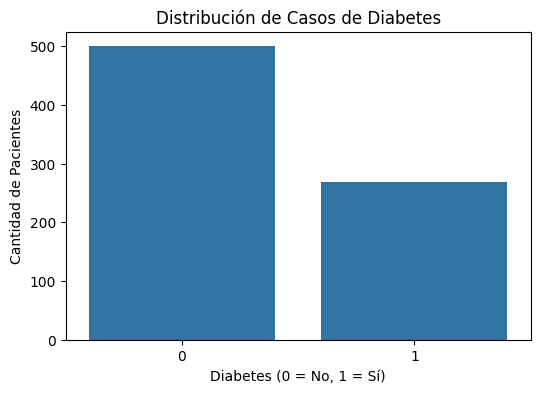

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribución de Casos de Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.show()

Histogramas de Variables Numéricas

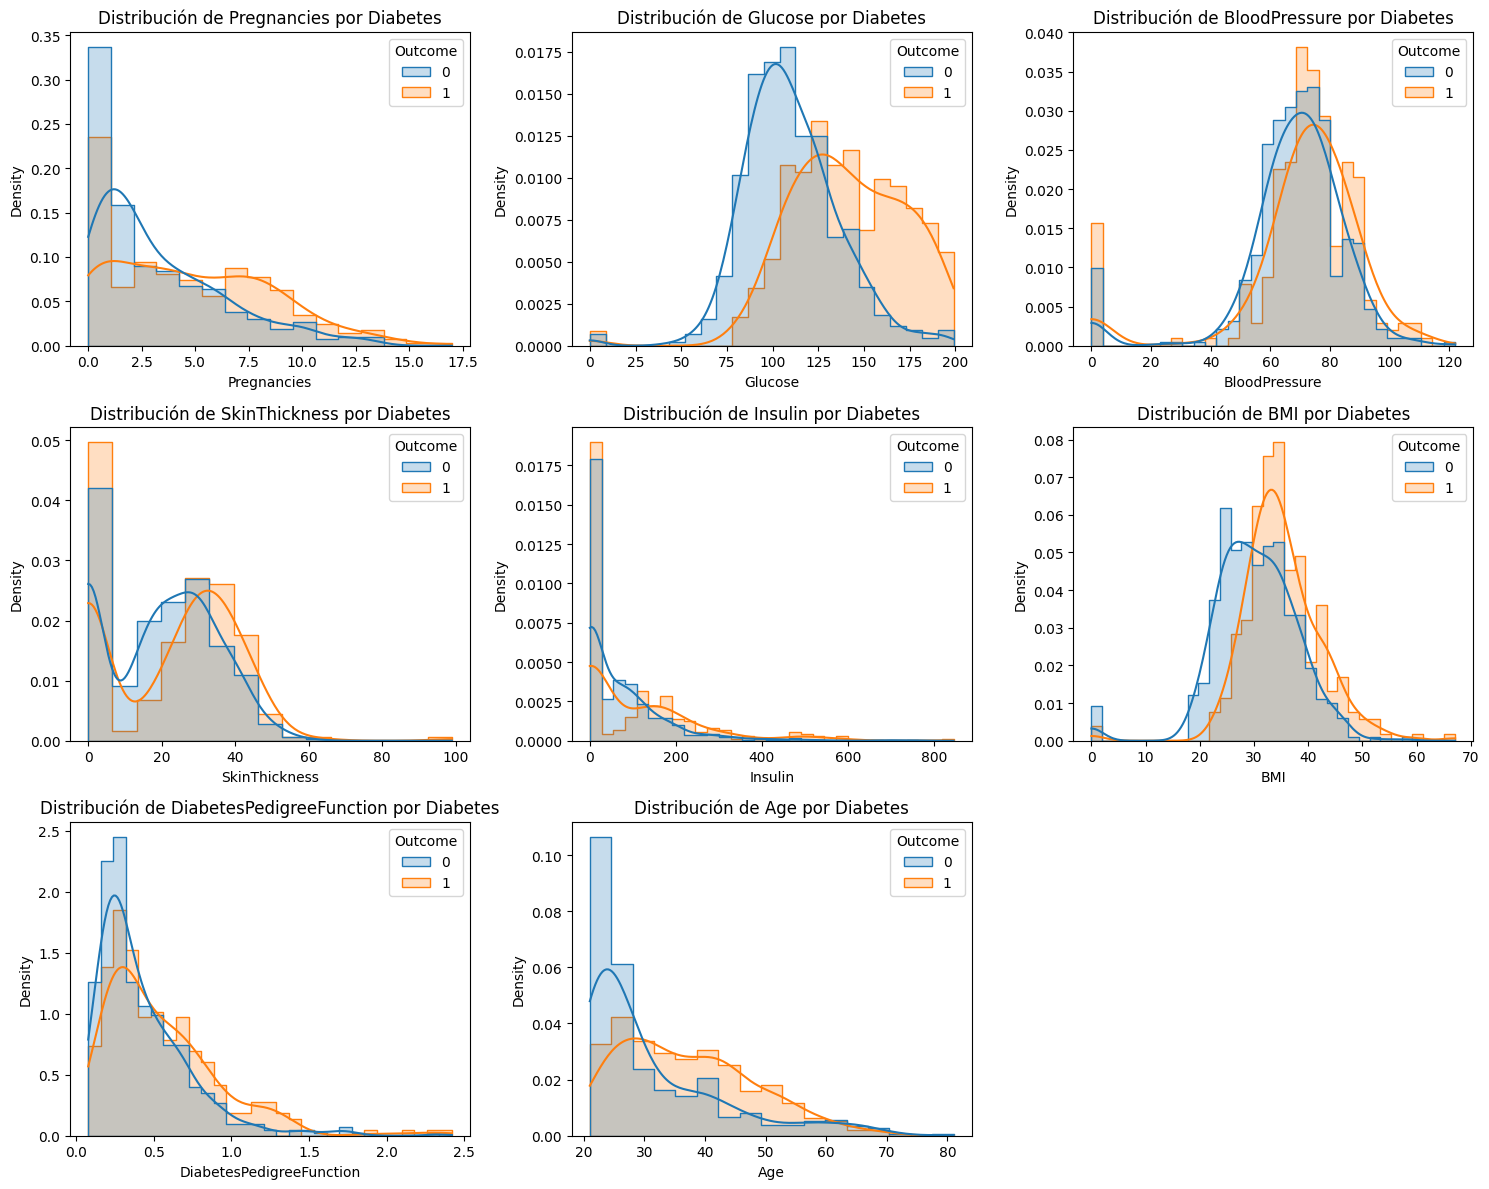

In [8]:
numeric_cols = data.columns[:-1]  # Todas excepto Outcome
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=col, hue='Outcome', kde=True, element='step', stat='Proportion', common_norm=False)
    plt.title(f'Distribución de {col} por Diabetes')
plt.tight_layout()
plt.show()

Diagramas de Caja por Estado de Diabetes

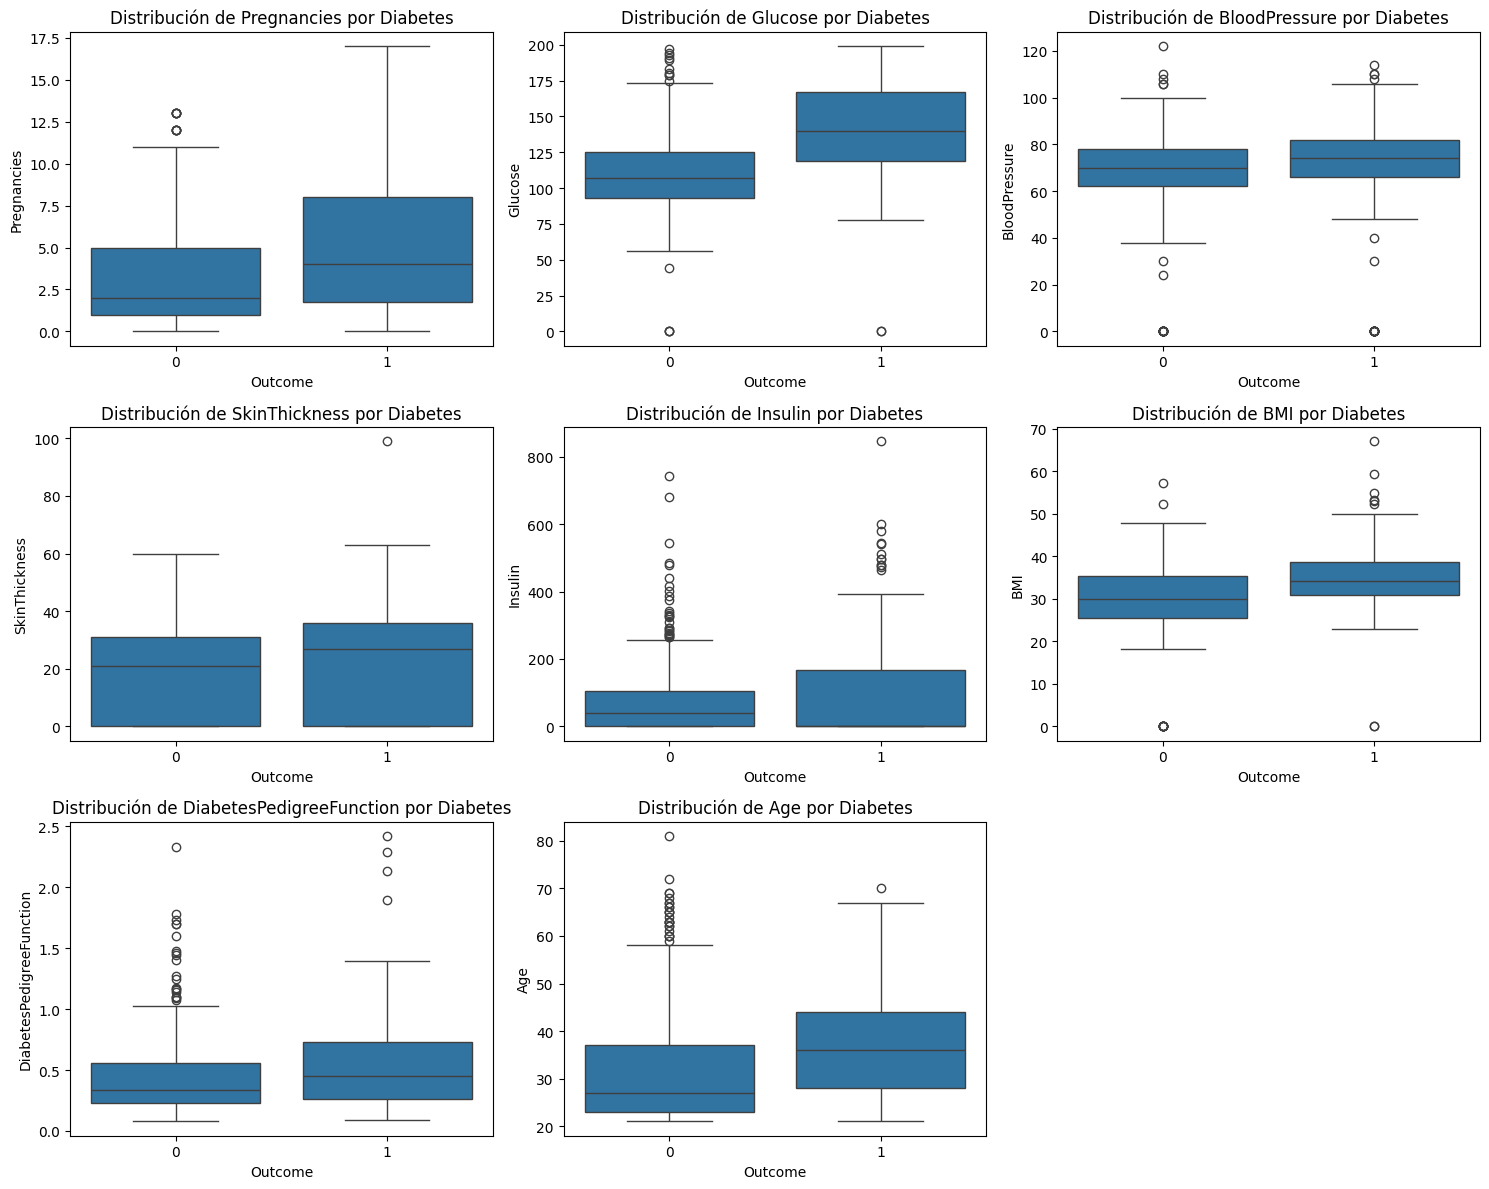

In [9]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'Distribución de {col} por Diabetes')
plt.tight_layout()
plt.show()

Matriz de correlacion

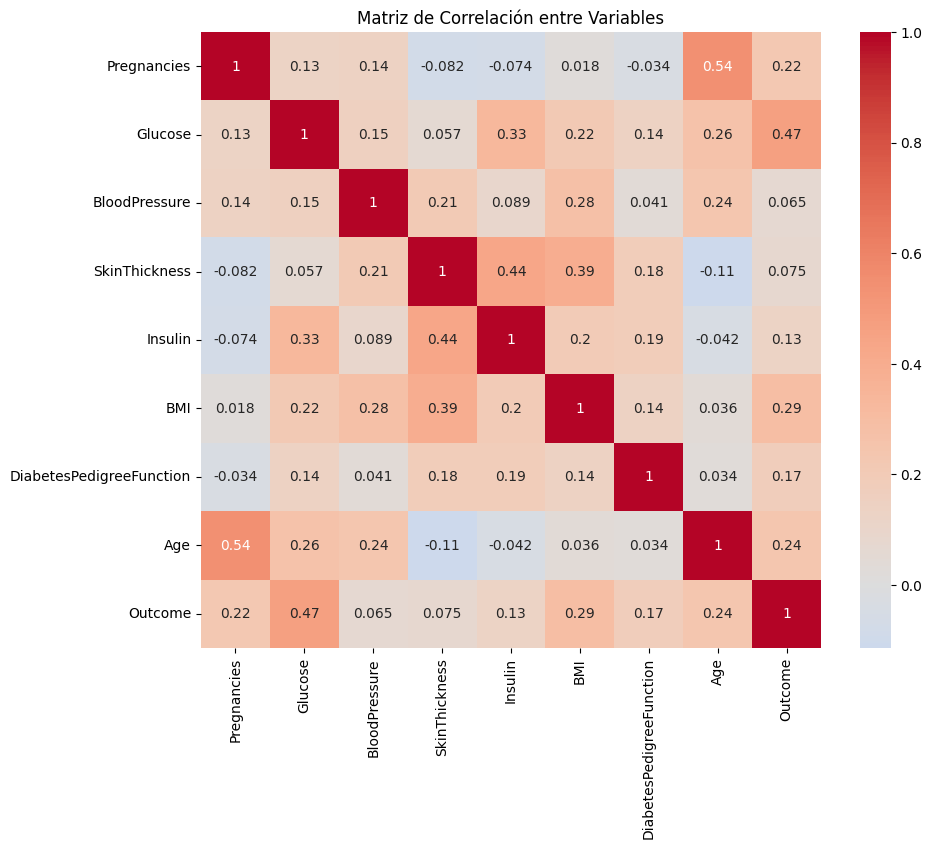

In [10]:
plt.figure(figsize=(10,8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación entre Variables')
plt.show()

 Gráficos de Dispersión para Variables Clave

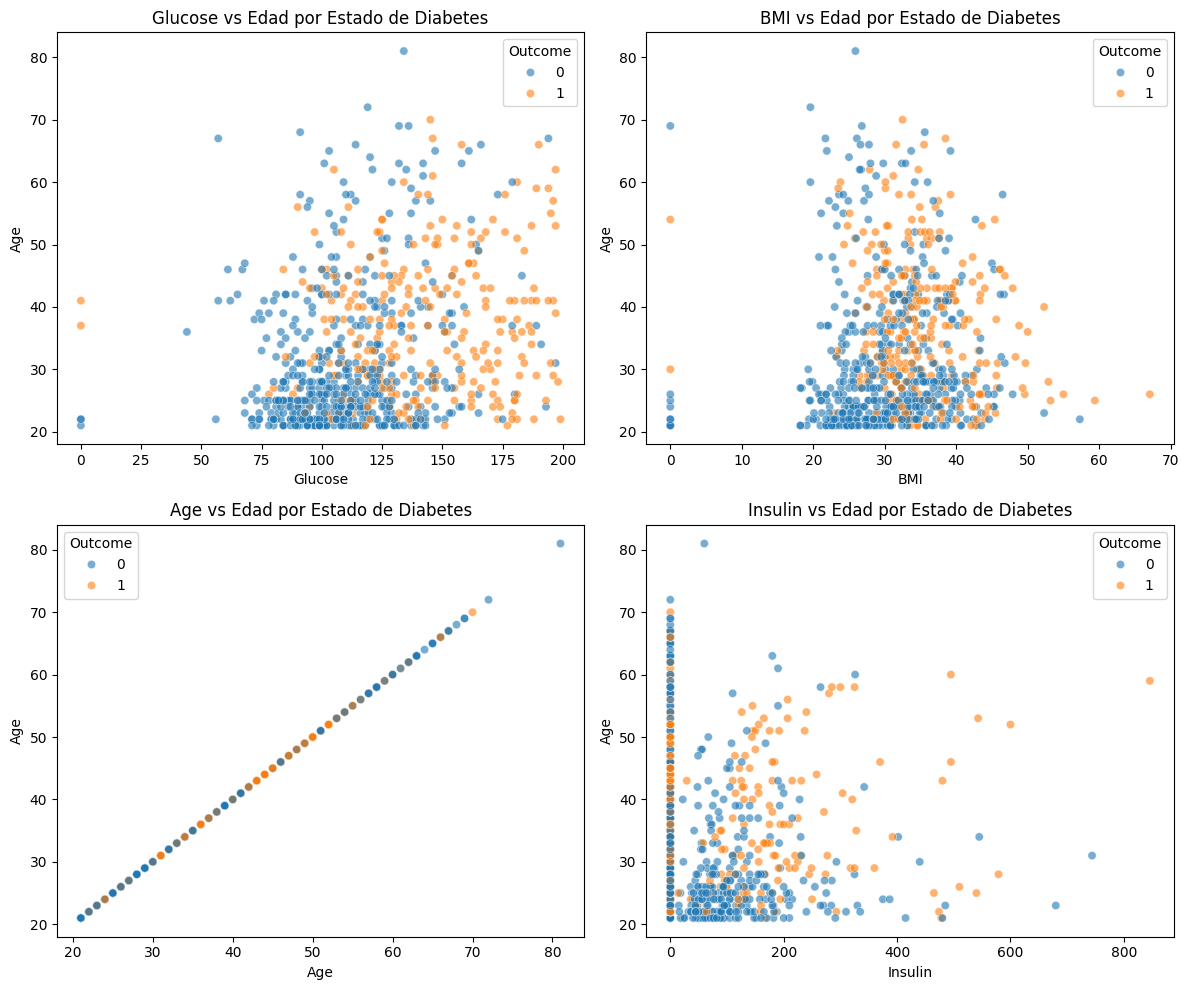

In [11]:
key_vars = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Insulin']
plt.figure(figsize=(12,10))
for i, var in enumerate(key_vars):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=var, y='Age', hue='Outcome', data=data, alpha=0.6)
    plt.title(f'{var} vs Edad por Estado de Diabetes')
plt.tight_layout()
plt.show()

Pairplot para Variables Seleccionadas


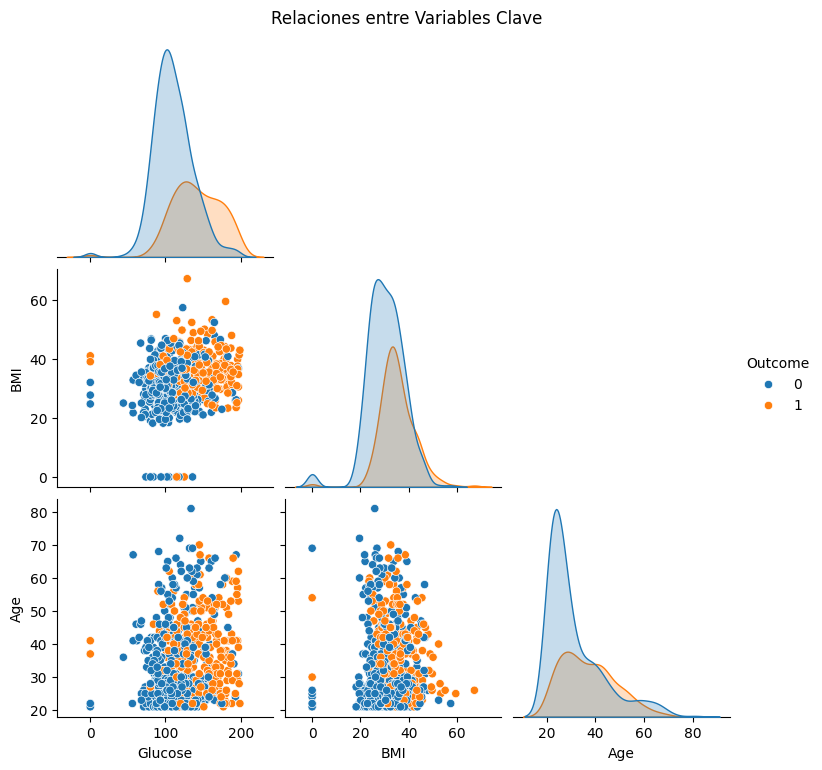

In [12]:
selected_vars = ['Glucose', 'BMI', 'Age', 'Outcome']
sns.pairplot(data[selected_vars], hue='Outcome', diag_kind='kde', corner=True)
plt.suptitle('Relaciones entre Variables Clave', y=1.02)
plt.show()

Gráfico de Violín para Variables Importantes

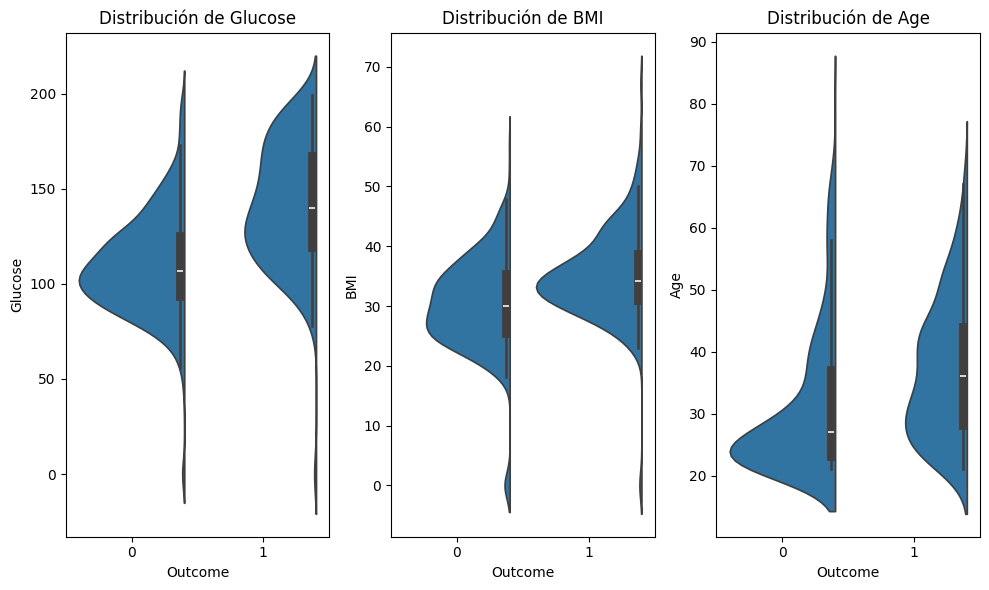

In [13]:
important_vars = ['Glucose', 'BMI', 'Age']
plt.figure(figsize=(10,6))
for i, var in enumerate(important_vars):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='Outcome', y=var, data=data, split=True)
    plt.title(f'Distribución de {var}')
plt.tight_layout()
plt.show()